# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool


In [ ]:
! wget -O stochastic_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrataegypool/master/pyalgostrategypool/stochastic_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' stochastic_crossover.py

In [5]:
from stochastic_crossover import StochasticCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130136,
 'strategyId': '8e5c3829078340938013dd67d10fcac7'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('RELIANCE', exchange='NSE')
instrument

[{'id': 87262, 'value': 'NSE:RCOM'},
 {'id': 111920, 'value': 'NSE:RELCAPITAL'},
 {'id': 396, 'value': 'NSE:RELIANCE'},
 {'id': 1674243, 'value': 'NSE:RELIANCE.AF'},
 {'id': 1674337, 'value': 'NSE:RELIANCE.BL'},
 {'id': 1674465, 'value': 'NSE:RELIANCE.RL'},
 {'id': 1674886, 'value': 'NSE:RELIANCEP1'},
 {'id': 1674887, 'value': 'NSE:RELIANCEP1.BL'},
 {'id': 556791, 'value': 'NSE:RELIANCEP1.E1'},
 {'id': 1674737, 'value': 'NSE:RELIANCEPP.BL'}]

## Setup Parameters

In [9]:
parameters = {
  'FASTK_PERIOD': 7,
  'SLOWK_PERIOD': 2,
  'SLOWD_PERIOD': 2
}

In [10]:
initial_virtual_funds = 70000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:RELIANCE', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Stochastic Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                     │
╞═════════════════════════╪═══════════════════════════════════════════════════════════╡
│ Strategy Name           │ Stochastic Crossover                                      │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                               │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:RELIANCE']                                          │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                                        │
├─────────────────────────┼────────────────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-08-22 13:37:47+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:48+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:48+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:49+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:49+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:50+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:50+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 13:37:51+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 19:07:46] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 19:07:46] Sanity checks on cfg successful.
[2023-08-22 19:07:46] Currency set to "INR"
[2023-08-22 19:07:46] Setting up broker connection...
[2023-08-22 19:07:47] Broker connection has been setup successfully.
[2023-08-22 19:07:47] (NSE_EQ) Funds ava

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                   NSE                 RELIANCE 2021-08-02 10:15:00+05:30   
1                   NSE                 RELIANCE 2021-08-02 15:15:00+05:30   
2                   NSE                 RELIANCE 2021-08-03 13:15:00+05:30   
3                   NSE                 RELIANCE 2021-08-04 10:15:00+05:30   
4                   NSE                 RELIANCE 2021-08-04 14:15:00+05:30   
...                 ...                      ...                       ...   
1267                NSE                 RELIANCE 2023-07-28 11:15:00+05:30   
1268                NSE                 RELIANCE 2023-07-28 13:15:00+05:30   
1269                NSE                 RELIANCE 2023-07-28 15:15:00+05:30   
1270                NSE                 RELIANCE 2023-07-31 09:15:00+05:30   
1271                NSE                 RELIANCE 2023-07-31 14:15:00+05:30   

     entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                       BUY              10              ₹      2057.90   
1                      SELL              10              ₹      2073.20   
2                       BUY              10              ₹      2075.95   
3                      SELL              10              ₹      2106.00   
4                       BUY              10              ₹      2102.45   
...                     ...             ...            ...          ...   
1267                   SELL              10              ₹      2513.50   
1268                    BUY              10              ₹      2528.20   
1269                   SELL              10              ₹      2528.35   
1270                    BUY              10              ₹      2527.85   
1271                   SELL              10              ₹      2537.00   

                exit_timestamp exit_transaction_type  exit_quantity  \
0    2021-08-02 15:15:00+05:30                  SELL             10   
1    2021-08-02 15:30:00+05:30                   BUY             10   
2    2021-08-03 15:30:00+05:30                  SELL             10   
3    2021-08-04 14:15:00+05:30                   BUY             10   
4    2021-08-04 15:15:00+05:30                  SELL             10   
...                        ...                   ...            ...   
1267 2023-07-28 13:15:00+05:30                   BUY             10   
1268 2023-07-28 15:15:00+05:30                  SELL             10   
1269 2023-07-28 15:30:00+05:30                   BUY             10   
1270 2023-07-31 14:15:00+05:30                  SELL             10   
1271 2023-07-31 15:30:00+05:30                   BUY             10   

     exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0                ₹     2073.20         153.0                    153.0  
1                ₹     2073.20           0.0                    153.0  
2                ₹     2085.60          96.5                    249.5  
3                ₹     2102.45          35.5                    285.0  
4                ₹     2104.10          16.5                    301.5  
...            ...         ...           ...                      ...  
1267             ₹     2528.20        -147.0                  13191.5  
1268             ₹     2528.35           1.5                  13193.0  
1269             ₹     2528.35           0.0                  13193.0  
1270             ₹     2537.00          91.5                  13284.5  
1271             ₹     2550.70        -137.0                  13147.5  

[1272 rows x 14 columns]

### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      84.0%

Cumulative Return   18.52%
CAGR﹪              8.89%

Sharpe              1.09
Prob. Sharpe Ratio  99.45%
Sortino             1.9
Sortino/√2          1.35
Omega               1.24

Max Drawdown        -4.42%
Longest DD Days     86

Gain/Pain Ratio     0.37
Gain/Pain (1M)      4.26

Payoff Ratio        1.53
Profit Factor       1.24
Common Sense Ratio  2.03
CPC Index           0.85
Tail Ratio          1.64
Outlier Win Ratio   4.88
Outlier Loss Ratio  3.49

MTD                 -0.61%
3M                  -1.16%
6M                  0.44%
YTD                 0.29%
1Y                  4.96%
3Y (ann.)           8.89%
5Y (ann.)           8.89%
10Y (ann.)          8.89%
All-time (ann.)     8.89%

Avg. Drawdown       -0.63%
Avg. Drawdown Days  11
Recovery Factor     4.19
Ulcer Index         0.01
Serenity Index      1.52


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             84.0%

Cumulative Return          18.52%
CAGR﹪                     8.89%

Sharpe                     1.09
Prob. Sharpe Ratio         99.45%
Smart Sharpe               1.09
Sortino                    1.9
Smart Sortino              1.89
Sortino/√2                 1.35
Smart Sortino/√2           1.34
Omega                      1.24

Max Drawdown               -4.42%
Longest DD Days            86
Volatility (ann.)          3.12%
Calmar                     2.01
Skew                       1.02
Kurtosis                   3.86

Expected Daily %           0.01%
Expected Monthly %         0.71%
Expected Yearly %          5.83%
Kelly Criterion            8.53%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.31%
Expected Shortfall (cVaR)  -0.31%

Max Consecutive Wins       5
Max

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-09-09  2021-10-04  2021-11-23    74     -4.421022         -4.393503
2  2022-05-25  2022-06-21  2022-08-19    86     -3.314279         -3.252429
3  2023-05-15  2023-07-18  2023-07-31    77     -2.474460         -2.324206
4  2022-09-09  2022-09-26  2022-10-19    39     -1.571473         -1.515087
5  2023-01-04  2023-02-03  2023-02-15    41     -1.450127         -1.393753

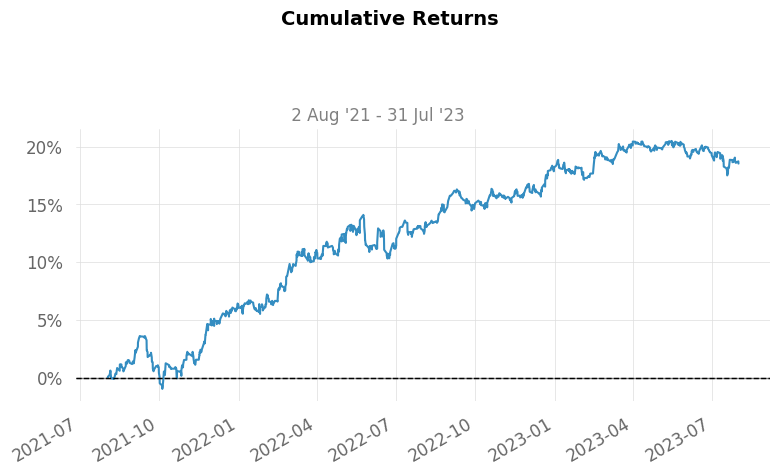

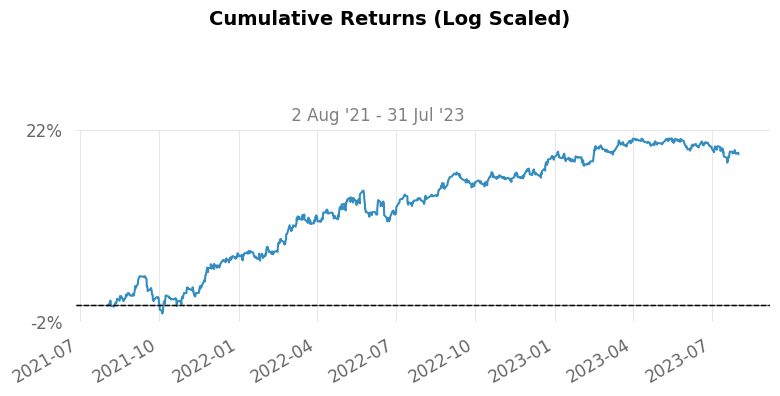

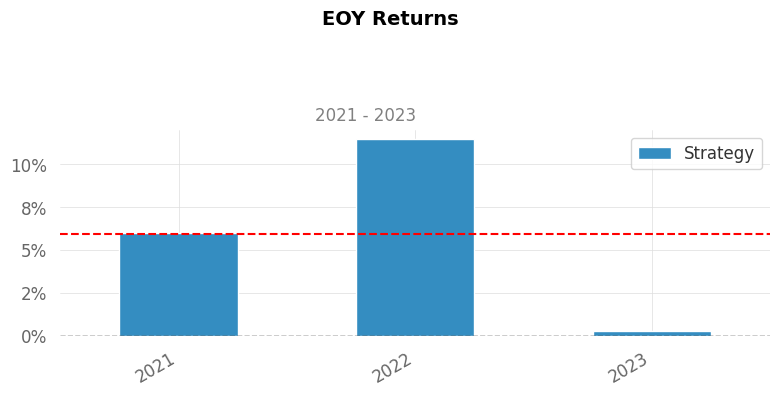

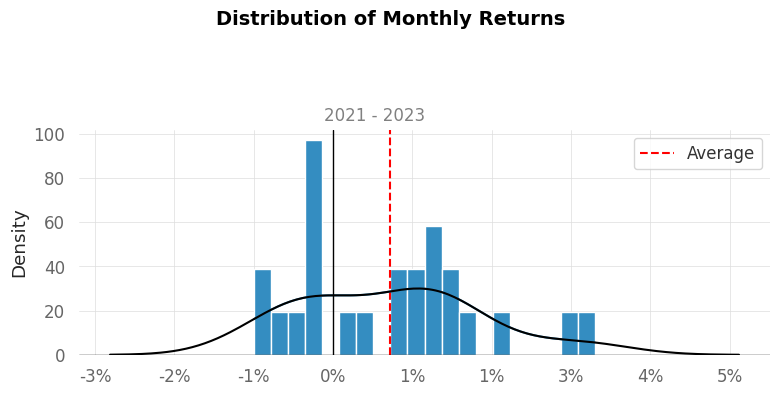

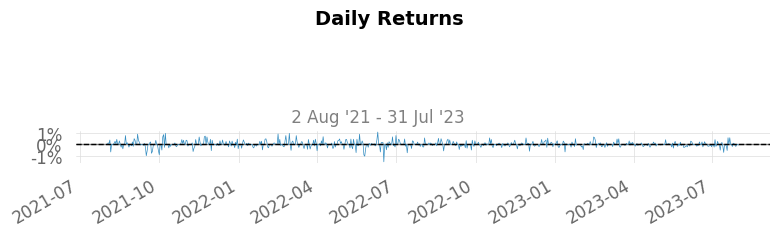

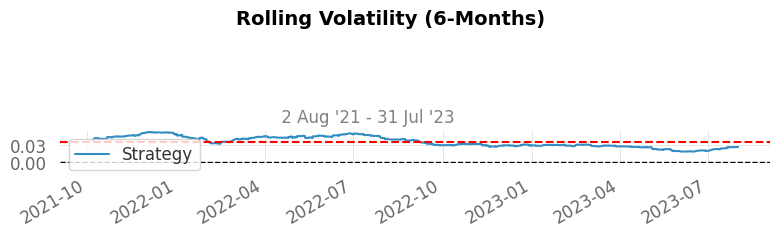

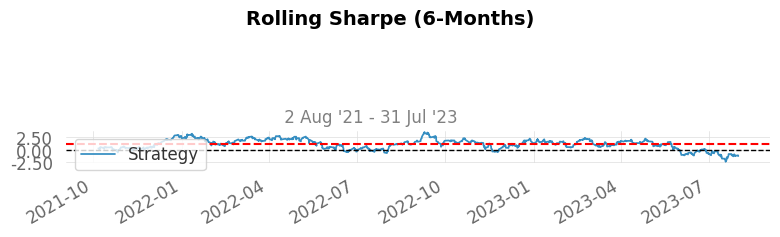

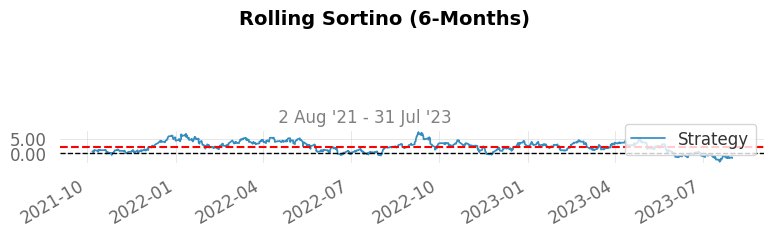

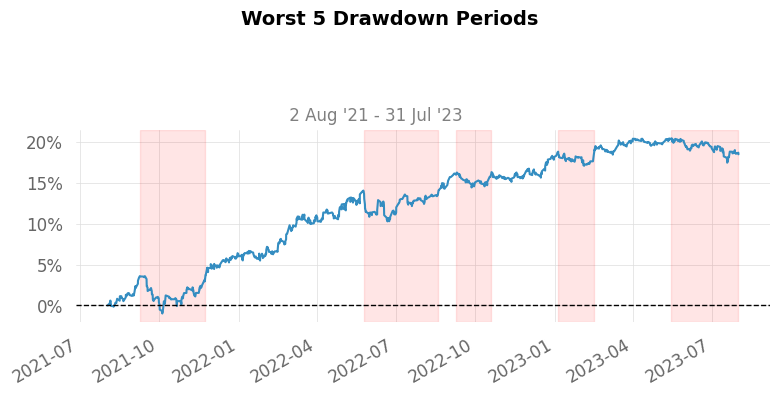

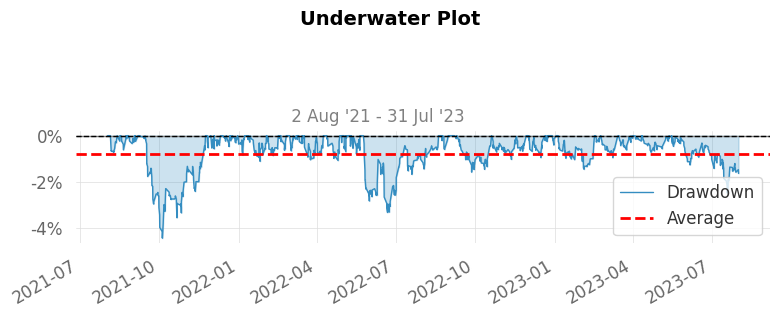

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


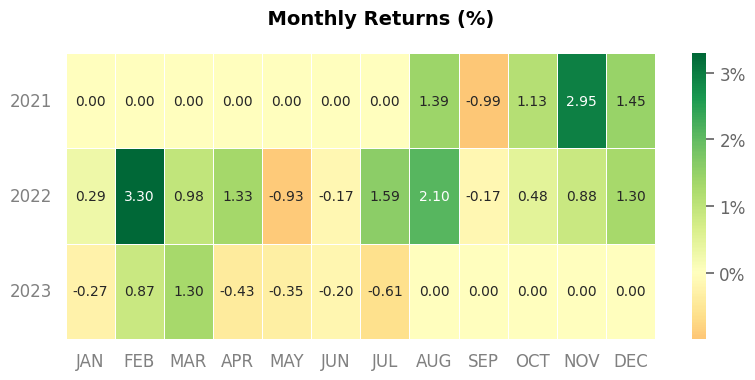

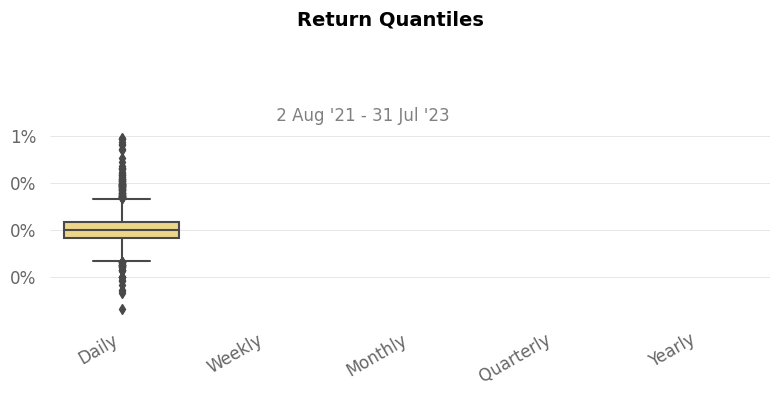

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+-----------------+---------------------------+----------------------------------+------+
| INST            | TIME                      | ID                               | TT   |
|-----------------+---------------------------+----------------------------------+------|
| NSE_EQ:RELIANCE | 2021-08-02 10:15:00+05:30 | d6e144b1639543afa01698645bfd87d0 | BUY  |
+-----------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-02 10:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 10:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 10:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-02 10:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-02 10:15:00+05:30 | COMPLETE               |       |
+---

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:RELIANCE', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---